# PROPENSITY MODELING


## Import Libraries

In [74]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth',None)

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from datetime import timedelta
import gc 

import warnings 
warnings.filterwarnings('ignore')

## Loading Dataset

In [11]:
data = pd.read_csv("final_customer_data_with_RFM_features.csv", parse_dates=['DateTime'])
print(data.shape)
data.head()

(2090, 18)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User_id        2090 non-null   int64         
 1   Session_id     2090 non-null   object        
 2   DateTime       2090 non-null   datetime64[ns]
 3   Category       2090 non-null   object        
 4   SubCategory    2090 non-null   object        
 5   Action         2090 non-null   object        
 6   Quantity       201 non-null    float64       
 7   Rate           201 non-null    float64       
 8   Total Price    201 non-null    float64       
 9   Recency        1303 non-null   float64       
 10  Frequency      1303 non-null   float64       
 11  Monetary       1303 non-null   float64       
 12  R              1303 non-null   float64       
 13  F              1303 non-null   float64       
 14  M              1303 non-null   float64       
 15  Group          1303 n

In [13]:
# Check the initial number of unique values in the 'Action' column
print(len(data.Action.value_counts()))

# Standardize certain values in the 'Action' column
data['Action'] = data['Action'].apply(lambda x: 'read_reviews' if x in ('read_review') else x)
data['Action'] = data['Action'].apply(lambda x: 'add_to_wishlist' if x in ('add_to_wishist') else x)

# Check the number of unique values in the 'Action' column after standardization
print(len(data.Action.value_counts()))


13
11


In [14]:
# Creating date level features
data['Date'] = data['DateTime'].dt.date
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['DayOfMonth'] = data['DateTime'].dt.day

In [15]:
df = data.copy()
df.head()

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level,Date,DayOfWeek,DayOfMonth
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10


## Feature Engineering:

### User Activity Features

#### Number of Days Active

In [16]:
# Group the DataFrame by 'User_id' and count the number of unique dates
temp_days_active = df.groupby('User_id').agg({'Date': 'nunique'}).reset_index()

# Rename the column to 'no_of_days_active'
temp_days_active.rename(columns={'Date':'no_of_days_active'}, inplace=True)

# Print the shape of the resulting DataFrame and display the first 3 rows
print(temp_days_active.shape)
temp_days_active.head(3)


(401, 2)


,User_id,no_of_days_active
0,51443820326,1
1,51448162784,3
2,51455512201,3


#### Average time between purchase

In [17]:
# del temp

In [18]:
temp = df.copy()

In [19]:
def purch_time_diff(x):
    # If there are 2 timestamps
    if len(x) == 2:
        return (x[1] - x[0]).days

    # If there are 3 timestamps
    if len(x) == 3:
        # Calculate the time difference between the first two timestamps
        diff_12 = (x[1] - x[0]).days
        # Calculate the time difference between the last two timestamps
        diff_23 = (x[2] - x[1]).days
        # Return the average of the two time differences
        return (diff_12 + diff_23) / 2


In [20]:
# Grouping purchase data by user and sorting by date
temp_user_purchase_date = (temp[temp['Action'] == 'purchase'].sort_values(by='Date')
                           .groupby('User_id').agg({'Date': lambda x: list(x)}).reset_index())

# Extracting first, second, and third purchase dates, if available
temp_user_purchase_date['purchase1'] = temp_user_purchase_date['Date'].apply(lambda x: x[0])
temp_user_purchase_date['purchase2'] = temp_user_purchase_date['Date'].apply(lambda x: x[1] if len(x) > 1 else 0)
temp_user_purchase_date['purchase3'] = temp_user_purchase_date['Date'].apply(lambda x: x[2] if len(x) > 2 else 0)

# Calculating the average time between purchases for each user
temp_user_purchase_date['avg_time_between_purchase'] = temp_user_purchase_date['Date'].apply(purch_time_diff)

# Displaying the shape of the DataFrame and the first few rows
print(temp_user_purchase_date.shape)
temp_user_purchase_date.head()


(167, 6)


,User_id,Date,purchase1,purchase2,purchase3,avg_time_between_purchase
0,51448162784,"[2019-06-11, 2019-12-12]",2019-06-11,2019-12-12,0,184.0
1,51455512201,[2019-10-19],2019-10-19,0,0,NaN
2,51462598385,"[2019-10-20, 2019-12-15]",2019-10-20,2019-12-15,0,56.0
3,51463622150,"[2019-10-14, 2019-11-12]",2019-10-14,2019-11-12,0,29.0
4,51465529647,"[2019-12-05, 2019-12-12]",2019-12-05,2019-12-12,0,7.0


#### Cart to Purchase Ratio

In [22]:
del temp

In [23]:
temp = df.copy()

In [24]:
# Define a function to calculate the ratio of a specific action to the number of purchases for each user
def purchase_ratios(action_col='add_to_cart', id_col='User_id', col_name='no_of_carts'):
    # Step 1: Calculate the number of occurrences of the specified action for each user
    test1 = (temp[temp['Action'] == action_col]
                          .groupby(id_col)
                          .agg({'Session_id': 'count'})
                          .reset_index())
    test1.rename(columns={'Session_id': col_name}, inplace=True)
    print("Shape of dataframe after counting", action_col, "actions:", test1.shape)
    
    # Step 2: Calculate the number of purchases for each user
    test2 = temp[temp['Action'] == 'purchase'].groupby(id_col).agg({'Session_id': 'count'}).reset_index()
    test2.rename(columns={'Session_id': 'no_of_purch'}, inplace=True)
    print("Shape of dataframe after counting purchases:", test2.shape)  
    
    # Step 3: Merge the two dataframes based on the user ID
    test_ratio = pd.merge(test1, test2, on=id_col, how='left')
    
    # Fill any missing values with zero and calculate the ratio of purchases to the specified action count
    test_ratio = test_ratio.fillna(0)
    test_ratio[col_name + '_to_purchase_ratio'] = (test_ratio['no_of_purch'] / test_ratio[col_name])
    print("Shape of final dataframe after merging and calculating ratios:", test_ratio.shape)
    
    # Return the resulting dataframe
    return test_ratio

# Call the function with default parameters and print the output
output_df = purchase_ratios()
output_df.head()



Shape of dataframe after counting add_to_cart actions: (240, 2)
Shape of dataframe after counting purchases: (167, 2)
Shape of final dataframe after merging and calculating ratios: (240, 4)


,User_id,no_of_carts,no_of_purch,no_of_carts_to_purchase_ratio
0,51448162784,2,2.0,1.000000
1,51455512201,1,1.0,1.000000
2,51462598385,2,2.0,1.000000
3,51463622150,2,2.0,1.000000
4,51465529647,3,2.0,0.666667


In [25]:
# cart to purchase ratio
temp_cart_purch_ratio_user = purchase_ratios(action_col='add_to_cart',id_col='User_id',col_name='no_of_carts')
print(temp_cart_purch_ratio_user.shape)
display(temp_cart_purch_ratio_user.head())
temp_cart_purch_ratio_user.describe()

Shape of dataframe after counting add_to_cart actions: (240, 2)
Shape of dataframe after counting purchases: (167, 2)
Shape of final dataframe after merging and calculating ratios: (240, 4)
(240, 4)


,User_id,no_of_carts,no_of_purch,no_of_carts_to_purchase_ratio
0,51448162784,2,2.0,1.000000
1,51455512201,1,1.0,1.000000
2,51462598385,2,2.0,1.000000
3,51463622150,2,2.0,1.000000
4,51465529647,3,2.0,0.666667


,User_id,no_of_carts,no_of_purch,no_of_carts_to_purchase_ratio
count,2.400000e+02,240.000000,240.000000,240.000000
mean,5.396592e+10,1.166667,0.754167,0.614583
std,2.767010e+09,0.405678,0.698162,0.534009
min,5.144816e+10,1.000000,0.000000,0.000000
25%,5.185721e+10,1.000000,0.000000,0.000000
50%,5.231850e+10,1.000000,1.000000,1.000000
75%,5.586744e+10,1.000000,1.000000,1.000000
max,6.030264e+10,3.000000,3.000000,3.000000


#### Wishlist to Purchase Ratio

In [26]:
temp = df.copy()

In [27]:
# Click wishlist to purchase ratio
temp_click_wishlist_purch_ratio_user = purchase_ratios(action_col='click_wishlist_page',
                                             id_col='User_id',col_name='no_of_click_wishlist')
print(temp_click_wishlist_purch_ratio_user.shape)
display(temp_click_wishlist_purch_ratio_user.head())
temp_click_wishlist_purch_ratio_user.describe()

Shape of dataframe after counting click_wishlist_page actions: (191, 2)
Shape of dataframe after counting purchases: (167, 2)
Shape of final dataframe after merging and calculating ratios: (191, 4)
(191, 4)


,User_id,no_of_click_wishlist,no_of_purch,no_of_click_wishlist_to_purchase_ratio
0,51448162784,1,2.0,2.0
1,51463622150,1,2.0,2.0
2,51465529647,1,2.0,2.0
3,51468519074,1,1.0,1.0
4,51475146821,1,0.0,0.0


,User_id,no_of_click_wishlist,no_of_purch,no_of_click_wishlist_to_purchase_ratio
count,1.910000e+02,191.000000,191.000000,191.000000
mean,5.403865e+10,1.057592,0.492147,0.458988
std,2.800753e+09,0.274978,0.687246,0.644753
min,5.144816e+10,1.000000,0.000000,0.000000
25%,5.182071e+10,1.000000,0.000000,0.000000
50%,5.230498e+10,1.000000,0.000000,0.000000
75%,5.618519e+10,1.000000,1.000000,1.000000
max,6.030264e+10,3.000000,3.000000,2.000000


In [28]:
# Add wishlist to purchase ratio
temp_add_wishlist_purch_ratio_user = purchase_ratios(action_col='add_to_wishlist',
                                             id_col='User_id',col_name='no_of_add_wishlist')
print(temp_add_wishlist_purch_ratio_user.shape)
display(temp_add_wishlist_purch_ratio_user.head())
temp_add_wishlist_purch_ratio_user.describe()

Shape of dataframe after counting add_to_wishlist actions: (26, 2)
Shape of dataframe after counting purchases: (167, 2)
Shape of final dataframe after merging and calculating ratios: (26, 4)
(26, 4)


,User_id,no_of_add_wishlist,no_of_purch,no_of_add_wishlist_to_purchase_ratio
0,51463622150,1,2.0,2.00
1,51477448981,2,1.0,0.50
2,51517997197,2,2.0,1.00
3,51526464449,1,2.0,2.00
4,51565158157,4,3.0,0.75


,User_id,no_of_add_wishlist,no_of_purch,no_of_add_wishlist_to_purchase_ratio
count,2.600000e+01,26.000000,26.000000,26.000000
mean,5.295457e+10,1.461538,1.538462,1.214744
std,2.529052e+09,0.760567,0.706018,0.694491
min,5.146362e+10,1.000000,0.000000,0.000000
25%,5.161642e+10,1.000000,1.000000,0.812500
50%,5.175573e+10,1.000000,2.000000,1.000000
75%,5.230051e+10,2.000000,2.000000,2.000000
max,5.953342e+10,4.000000,3.000000,2.000000


#### Path to Cart

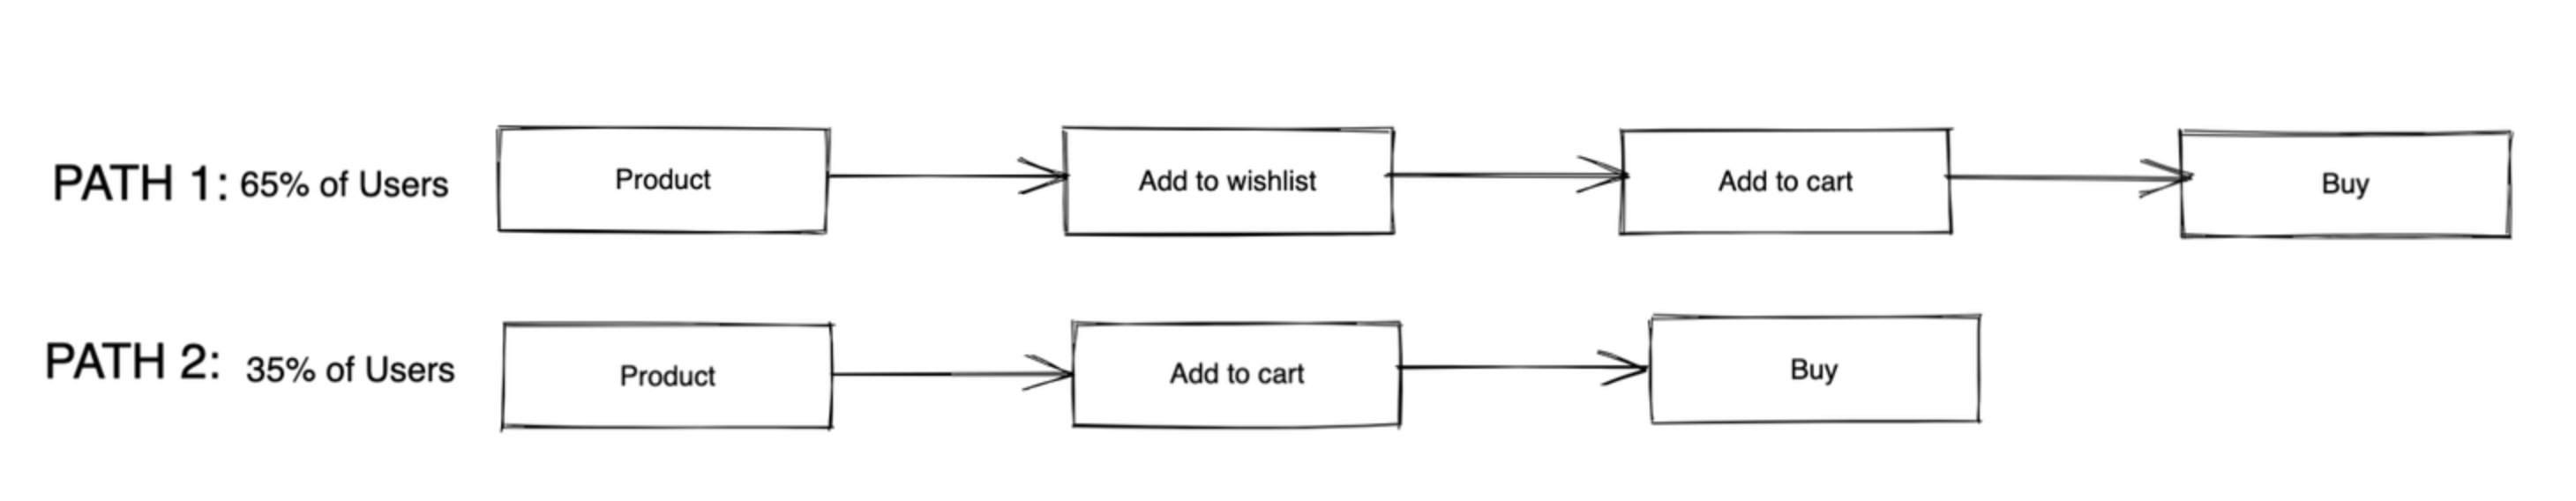

In [29]:
temp = df.copy()

In [30]:
# Filtering the dataset by max add_to_cart date for each user (All users who have done add_to_cart event)
temp = (temp.sort_values(by='DateTime')
        [(temp.DateTime <= temp.User_id.map(temp[temp['Action']=='add_to_cart'].groupby('User_id').DateTime.max()))
        ])
print(temp.shape)
print(temp.User_id.nunique())
temp.head(3)

(1192, 21)
240


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level,Date,DayOfWeek,DayOfMonth
942,51725305614,hfg03b-d558-4953-b218,2019-01-01 11:00:00,Men's Fashion,Shirts,search,NaN,NaN,NaN,24.0,2.0,4750.0,4.0,4.0,3.0,443.0,11.0,Platinum,2019-01-01,1,1
943,51725305614,cbvg11b4-fadf-4d3c-8834,2019-01-01 11:05:00,Men's Fashion,Shirts,product_view,NaN,NaN,NaN,24.0,2.0,4750.0,4.0,4.0,3.0,443.0,11.0,Platinum,2019-01-01,1,1
944,51725305614,gcv0ec1-a246-4d24-b94a,2019-01-01 11:10:00,Men's Fashion,Shirts,read_reviews,NaN,NaN,NaN,24.0,2.0,4750.0,4.0,4.0,3.0,443.0,11.0,Platinum,2019-01-01,1,1


In [ ]:
# temp[temp['User_id']==51592642763].sort_values(by='DateTime')

In [31]:
import re

# Extracting the paths
last_3_actions = r'((?:\S+\s+){0,3}\badd_to_cart)'
temp_path =  temp.sort_values(by='DateTime').groupby('User_id').agg({'Action': lambda x: list(x)}).reset_index()
temp_path['Action_cleaned'] = temp_path['Action'].apply(lambda x: ' '.join(x))
temp_path['Last_3_Actions'] = temp_path['Action_cleaned'].apply(lambda x: re.findall(last_3_actions,x))

# Cleaning and selecting the latest path for each user
temp_path['Final_3_Actions'] = temp_path['Last_3_Actions'].apply(lambda x: x[0] if len(x)==1 else x)
temp_path['Final_3_Actions'] = temp_path['Final_3_Actions'].apply(lambda x: x[1] if len(x)==2 else x)
temp_path['Final_3_Actions'] = temp_path['Final_3_Actions'].apply(lambda x: x[2] if len(x)==3 else x)

print(temp_path.shape)
temp_path.head()

(240, 5)


,User_id,Action,Action_cleaned,Last_3_Actions,Final_3_Actions
0,51448162784,"[first_app_open, search, product_view, read_reviews, add_to_cart, search, read_reviews, add_to_cart]",first_app_open search product_view read_reviews add_to_cart search read_reviews add_to_cart,"[search product_view read_reviews add_to_cart, search read_reviews add_to_cart]",search read_reviews add_to_cart
1,51455512201,"[first_app_open, search, product_view, read_reviews, search, product_view, read_reviews, add_to_cart]",first_app_open search product_view read_reviews search product_view read_reviews add_to_cart,[search product_view read_reviews add_to_cart],search product_view read_reviews add_to_cart
2,51462598385,"[search, product_view, read_reviews, add_to_cart, search, product_view, add_to_cart]",search product_view read_reviews add_to_cart search product_view add_to_cart,"[search product_view read_reviews add_to_cart, search product_view add_to_cart]",search product_view add_to_cart
3,51463622150,"[first_app_open, search, read_reviews, search, product_view, add_to_wishlist, checkout, purchase, search, click_wishlist_page, add_to_cart, search, product_view, add_to_cart]",first_app_open search read_reviews search product_view add_to_wishlist checkout purchase search click_wishlist_page add_to_cart search product_view add_to_cart,"[purchase search click_wishlist_page add_to_cart, search product_view add_to_cart]",search product_view add_to_cart
4,51465529647,"[search, add_to_cart, click_wishlist_page, add_to_cart, search, add_to_cart]",search add_to_cart click_wishlist_page add_to_cart search add_to_cart,"[search add_to_cart click_wishlist_page add_to_cart, search add_to_cart]",search add_to_cart


In [32]:
temp_path.Final_3_Actions.value_counts()

product_view read_reviews click_wishlist_page add_to_cart       29
add_to_cart                                                     25
read_reviews click_wishlist_page add_to_cart                    25
click_wishlist_page add_to_cart                                 24
search product_view read_reviews add_to_cart                    21
read_reviews add_to_cart                                        10
product_view read_reviews add_to_cart                           10
read_reviews product_view click_wishlist_page add_to_cart        9
search read_reviews click_wishlist_page add_to_cart              9
search product_view add_to_cart                                  6
search product_view click_wishlist_page add_to_cart              6
product_view click_wishlist_page add_to_cart                     6
search read_reviews add_to_cart                                  5
product_view add_to_cart                                         3
first_app_open search read_reviews add_to_cart                

In [33]:
# Grouping the paths to top 10 and rest as others
top_10_paths = temp_path.Final_3_Actions.value_counts()[:10].index.to_list()
print(top_10_paths)
temp_path['top_paths'] = temp_path['Final_3_Actions'].apply(lambda x: x if x in top_10_paths else 'others')
temp_path.head()

['product_view read_reviews click_wishlist_page add_to_cart', 'add_to_cart', 'read_reviews click_wishlist_page add_to_cart', 'click_wishlist_page add_to_cart', 'search product_view read_reviews add_to_cart', 'read_reviews add_to_cart', 'product_view read_reviews add_to_cart', 'read_reviews product_view click_wishlist_page add_to_cart', 'search read_reviews click_wishlist_page add_to_cart', 'search product_view add_to_cart']


,User_id,Action,Action_cleaned,Last_3_Actions,Final_3_Actions,top_paths
0,51448162784,"[first_app_open, search, product_view, read_reviews, add_to_cart, search, read_reviews, add_to_cart]",first_app_open search product_view read_reviews add_to_cart search read_reviews add_to_cart,"[search product_view read_reviews add_to_cart, search read_reviews add_to_cart]",search read_reviews add_to_cart,others
1,51455512201,"[first_app_open, search, product_view, read_reviews, search, product_view, read_reviews, add_to_cart]",first_app_open search product_view read_reviews search product_view read_reviews add_to_cart,[search product_view read_reviews add_to_cart],search product_view read_reviews add_to_cart,search product_view read_reviews add_to_cart
2,51462598385,"[search, product_view, read_reviews, add_to_cart, search, product_view, add_to_cart]",search product_view read_reviews add_to_cart search product_view add_to_cart,"[search product_view read_reviews add_to_cart, search product_view add_to_cart]",search product_view add_to_cart,search product_view add_to_cart
3,51463622150,"[first_app_open, search, read_reviews, search, product_view, add_to_wishlist, checkout, purchase, search, click_wishlist_page, add_to_cart, search, product_view, add_to_cart]",first_app_open search read_reviews search product_view add_to_wishlist checkout purchase search click_wishlist_page add_to_cart search product_view add_to_cart,"[purchase search click_wishlist_page add_to_cart, search product_view add_to_cart]",search product_view add_to_cart,search product_view add_to_cart
4,51465529647,"[search, add_to_cart, click_wishlist_page, add_to_cart, search, add_to_cart]",search add_to_cart click_wishlist_page add_to_cart search add_to_cart,"[search add_to_cart click_wishlist_page add_to_cart, search add_to_cart]",search add_to_cart,others


In [34]:
temp_path.top_paths.value_counts()

others                                                       72
product_view read_reviews click_wishlist_page add_to_cart    29
read_reviews click_wishlist_page add_to_cart                 25
add_to_cart                                                  25
click_wishlist_page add_to_cart                              24
search product_view read_reviews add_to_cart                 21
product_view read_reviews add_to_cart                        10
read_reviews add_to_cart                                     10
search read_reviews click_wishlist_page add_to_cart           9
read_reviews product_view click_wishlist_page add_to_cart     9
search product_view add_to_cart                               6
Name: top_paths, dtype: int64

### Category/SubCategory level Features

#### Cart to Purchase ratio (Category/SubCategory)

In [35]:
del temp

In [36]:
temp = df.copy()

In [37]:
temp.head(3)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level,Date,DayOfWeek,DayOfMonth
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10


In [38]:
# Category level - cart_to_purchase_ratio
temp_cart_purch_ratio_category = purchase_ratios(action_col='add_to_cart',
                                                 id_col='Category',col_name='category_no_of_carts')
display(temp_cart_purch_ratio_category.head())
temp_cart_purch_ratio_category.describe()

Shape of dataframe after counting add_to_cart actions: (89, 2)
Shape of dataframe after counting purchases: (75, 2)
Shape of final dataframe after merging and calculating ratios: (89, 4)


,Category,category_no_of_carts,no_of_purch,category_no_of_carts_to_purchase_ratio
0,Accessories,15,12.0,0.8
1,Air Conditioner,1,2.0,2.0
2,Appliances,1,1.0,1.0
3,Artwork,1,0.0,0.0
4,Audio,1,0.0,0.0


,category_no_of_carts,no_of_purch,category_no_of_carts_to_purchase_ratio
count,89.000000,89.000000,89.000000
mean,3.146067,2.224719,0.741005
std,3.540514,2.708374,0.564977
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.333333
50%,2.000000,1.000000,0.750000
75%,3.000000,3.000000,1.000000
max,16.000000,14.000000,3.000000


In [39]:
# SubCategory level - cart_to_purchase_ratio
temp_cart_purch_ratio_subcategory = (purchase_ratios(action_col='add_to_cart',
                                                     id_col='SubCategory',col_name='subcategory_no_of_carts'))
display(temp_cart_purch_ratio_subcategory.head())
temp_cart_purch_ratio_subcategory.describe()

Shape of dataframe after counting add_to_cart actions: (239, 2)
Shape of dataframe after counting purchases: (176, 2)
Shape of final dataframe after merging and calculating ratios: (239, 4)


,SubCategory,subcategory_no_of_carts,no_of_purch,subcategory_no_of_carts_to_purchase_ratio
0,Air Tight Container,1,0.0,0.0
1,Air coolers,1,1.0,1.0
2,Amazon Alexa,1,0.0,0.0
3,Amplifier,1,1.0,1.0
4,Audio Speakers,1,0.0,0.0


,subcategory_no_of_carts,no_of_purch,subcategory_no_of_carts_to_purchase_ratio
count,239.000000,239.000000,239.000000
mean,1.171548,0.769874,0.656555
std,0.654546,0.711086,0.499926
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,8.000000,4.000000,2.000000


#### Wishlist to Purchase Ratio (Category/SubCategory)

In [40]:
del temp

In [41]:
temp = df.copy()

In [42]:
# Category level - click_wishlist_to_purchase_ratio
temp_click_wishlist_purch_ratio_category = (purchase_ratios(action_col='click_wishlist_page',
                                                    id_col='Category',col_name='category_no_of_click_wishlist'))
print(temp_click_wishlist_purch_ratio_category.shape)
display(temp_click_wishlist_purch_ratio_category.head())
temp_click_wishlist_purch_ratio_category.describe()

Shape of dataframe after counting click_wishlist_page actions: (72, 2)
Shape of dataframe after counting purchases: (75, 2)
Shape of final dataframe after merging and calculating ratios: (72, 4)
(72, 4)


,Category,category_no_of_click_wishlist,no_of_purch,category_no_of_click_wishlist_to_purchase_ratio
0,Accessories,14,12.0,0.857143
1,Appliances,3,1.0,0.333333
2,Artwork,1,0.0,0.000000
3,Audio,1,0.0,0.000000
4,Baby Care,4,1.0,0.250000


,category_no_of_click_wishlist,no_of_purch,category_no_of_click_wishlist_to_purchase_ratio
count,72.000000,72.000000,72.000000
mean,2.805556,2.430556,0.913683
std,2.548896,2.963755,0.858968
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.250000
50%,2.000000,1.000000,0.791667
75%,4.000000,3.000000,1.500000
max,14.000000,14.000000,4.000000


In [43]:
# SubCategory level - click_wishlist_to_purchase_ratio
temp_click_wishlist_purch_ratio_subcategory = (purchase_ratios(action_col='click_wishlist_page',
                                                    id_col='SubCategory',col_name='subcategory_no_of_click_wishlist'))
print(temp_click_wishlist_purch_ratio_subcategory.shape)
display(temp_click_wishlist_purch_ratio_subcategory.head())
temp_click_wishlist_purch_ratio_subcategory.describe()

Shape of dataframe after counting click_wishlist_page actions: (175, 2)
Shape of dataframe after counting purchases: (176, 2)
Shape of final dataframe after merging and calculating ratios: (175, 4)
(175, 4)


,SubCategory,subcategory_no_of_click_wishlist,no_of_purch,subcategory_no_of_click_wishlist_to_purchase_ratio
0,Air Tight Container,1,0.0,0.0
1,Air coolers,1,1.0,1.0
2,Amazon Alexa,1,0.0,0.0
3,Audio Speakers,1,0.0,0.0
4,Baby Shampoo,1,0.0,0.0


,subcategory_no_of_click_wishlist,no_of_purch,subcategory_no_of_click_wishlist_to_purchase_ratio
count,175.000000,175.000000,175.000000
mean,1.154286,0.520000,0.450000
std,0.581488,0.725876,0.595253
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,6.000000,4.000000,4.000000


In [44]:
# Category level - add_wishlist_to_purchase_ratio
temp_add_wishlist_purch_ratio_category = (purchase_ratios(action_col='add_to_wishlist',
                                                        id_col='Category',col_name='category_no_of_add_wishlist'))
print(temp_add_wishlist_purch_ratio_category.shape)
display(temp_add_wishlist_purch_ratio_category.head())
temp_add_wishlist_purch_ratio_category.describe()

Shape of dataframe after counting add_to_wishlist actions: (18, 2)
Shape of dataframe after counting purchases: (75, 2)
Shape of final dataframe after merging and calculating ratios: (18, 4)
(18, 4)


,Category,category_no_of_add_wishlist,no_of_purch,category_no_of_add_wishlist_to_purchase_ratio
0,Accessories,3,12,4.0
1,Baby Care,1,1,1.0
2,Bed room,1,5,5.0
3,Digital Appliances,1,2,2.0
4,Digital Devices,5,7,1.4


,category_no_of_add_wishlist,no_of_purch,category_no_of_add_wishlist_to_purchase_ratio
count,18.000000,18.000000,18.000000
mean,2.111111,5.333333,2.901852
std,1.529663,4.130233,2.395843
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000
50%,1.500000,4.000000,2.166667
75%,2.750000,8.750000,3.750000
max,6.000000,14.000000,9.000000


In [45]:
# SubCategory level - add_wishlist_to_purchase_ratio
temp_add_wishlist_purch_ratio_subcategory = (purchase_ratios(action_col='add_to_wishlist',
                                                    id_col='SubCategory',col_name='subcategory_no_of_add_wishlist'))
print(temp_add_wishlist_purch_ratio_subcategory.shape)
display(temp_add_wishlist_purch_ratio_subcategory.head())
temp_add_wishlist_purch_ratio_subcategory.describe()

Shape of dataframe after counting add_to_wishlist actions: (26, 2)
Shape of dataframe after counting purchases: (176, 2)
Shape of final dataframe after merging and calculating ratios: (26, 4)
(26, 4)


,SubCategory,subcategory_no_of_add_wishlist,no_of_purch,subcategory_no_of_add_wishlist_to_purchase_ratio
0,Books,2,4,2.000000
1,Bp monitors,1,1,1.000000
2,Bumpers,1,1,1.000000
3,Cases,3,2,0.666667
4,Charging wire,1,3,3.000000


,subcategory_no_of_add_wishlist,no_of_purch,subcategory_no_of_add_wishlist_to_purchase_ratio
count,26.000000,26.000000,26.000000
mean,1.461538,1.538462,1.185897
std,0.706018,1.066987,0.872196
min,1.000000,1.000000,0.333333
25%,1.000000,1.000000,0.750000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000
max,3.000000,4.000000,4.000000


#### Product View to Purchase ratio (Category/SubCategory)

In [46]:
del temp

In [47]:
temp = df.copy()

In [48]:
# Category level - produc_view_wishlist_to_purchase_ratio
temp_product_view_purch_ratio_category = (purchase_ratios(action_col='product_view',
                                                        id_col='Category',col_name='category_no_of_product_view'))
print(temp_product_view_purch_ratio_category.shape)
display(temp_product_view_purch_ratio_category.head())
temp_product_view_purch_ratio_category.describe()

Shape of dataframe after counting product_view actions: (90, 2)
Shape of dataframe after counting purchases: (75, 2)
Shape of final dataframe after merging and calculating ratios: (90, 4)
(90, 4)


,Category,category_no_of_product_view,no_of_purch,category_no_of_product_view_to_purchase_ratio
0,Accessories,9,12.0,1.333333
1,Air Conditioner,7,2.0,0.285714
2,Artwork,1,0.0,0.000000
3,Audio,1,0.0,0.000000
4,Baby Care,3,1.0,0.333333


,category_no_of_product_view,no_of_purch,category_no_of_product_view_to_purchase_ratio
count,90.000000,90.000000,90.000000
mean,3.244444,2.077778,0.607009
std,3.468352,2.769123,0.634233
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.500000
75%,4.000000,2.750000,1.000000
max,26.000000,14.000000,3.000000


In [49]:
# SubCategory level - produc_view_wishlist_to_purchase_ratio
temp_product_view_purch_ratio_subcategory = (purchase_ratios(action_col='product_view',
                                                    id_col='SubCategory',col_name='subcategory_no_of_product_view'))
print(temp_product_view_purch_ratio_subcategory.shape)
display(temp_product_view_purch_ratio_subcategory.head())
temp_product_view_purch_ratio_subcategory.describe()

Shape of dataframe after counting product_view actions: (216, 2)
Shape of dataframe after counting purchases: (176, 2)
Shape of final dataframe after merging and calculating ratios: (216, 4)
(216, 4)


,SubCategory,subcategory_no_of_product_view,no_of_purch,subcategory_no_of_product_view_to_purchase_ratio
0,Amazon Alexa,1,0.0,0.000000
1,Arm sleeve,1,0.0,0.000000
2,Aux Cable,3,1.0,0.333333
3,Baby Shampoo,1,0.0,0.000000
4,Baby Shower gel,1,0.0,0.000000


,subcategory_no_of_product_view,no_of_purch,subcategory_no_of_product_view_to_purchase_ratio
count,216.000000,216.000000,216.000000
mean,1.351852,0.495370,0.319422
std,0.860663,0.753273,0.431870
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.666667
max,7.000000,4.000000,1.500000


## Modeling Dataset Creation

In [50]:
print(df.shape)
df.head()

(2090, 21)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price,Recency,Frequency,Monetary,R,F,M,Group,Score,Loyalty_Level,Date,DayOfWeek,DayOfMonth
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-10,3,10


In [51]:
# Target group of people are those who added items to the cart (Trigger point)
df_base = (df[df['Action']=='add_to_cart']
              .groupby('User_id').agg({'Category':'max','SubCategory':'max'}).reset_index())

print(df_base.shape)
df_base.head()

(240, 3)


,User_id,Category,SubCategory
0,51448162784,Camera Accessories,Camera Lens
1,51455512201,Men's Fashion,Shoes
2,51462598385,Mobile & Accessories,USB Cord
3,51463622150,Stationary,Paints
4,51465529647,Home Decor,Wall hangings


In [52]:
# Adding days_active
df_base = pd.merge(df_base, temp_days_active, on='User_id', how='left')
print(df_base.shape)
df_base.head(3)

(240, 4)


,User_id,Category,SubCategory,no_of_days_active
0,51448162784,Camera Accessories,Camera Lens,3
1,51455512201,Men's Fashion,Shoes,3
2,51462598385,Mobile & Accessories,USB Cord,5


In [53]:
# Adding RFM features
temp_rfm_feats = df.groupby('User_id').agg({'R': 'max','F':'max','M':'max','Loyalty_Level':'max'}).reset_index()
df_base = pd.merge(df_base, temp_rfm_feats, on='User_id', how='left')
print(df_base.shape)
df_base.head(3)

(240, 8)


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum


In [54]:
# Adding average time between purchase
df_base = pd.merge(df_base, temp_user_purchase_date[['User_id','avg_time_between_purchase']], 
                   on='User_id', how='left')
print(df_base.shape)
df_base.head(3)

(240, 9)


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level,avg_time_between_purchase
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum,184.0
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold,NaN
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum,56.0


In [55]:
# Adding carts to purchase ratio
df_base = pd.merge(df_base, temp_cart_purch_ratio_user[['User_id','no_of_carts_to_purchase_ratio']], 
                   on='User_id', how='left')
print(df_base.shape)
df_base.head(3)

(240, 10)


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level,avg_time_between_purchase,no_of_carts_to_purchase_ratio
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum,184.0,1.0
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold,NaN,1.0
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum,56.0,1.0


In [56]:
# Adding wishlist to purchase ratios (click & add)
df_base = pd.merge(df_base, 
                   temp_click_wishlist_purch_ratio_user[['User_id','no_of_click_wishlist_to_purchase_ratio']], 
                   on='User_id', how='left')
print(df_base.shape)

df_base = pd.merge(df_base, 
                   temp_add_wishlist_purch_ratio_user[['User_id','no_of_add_wishlist_to_purchase_ratio']], 
                   on='User_id', how='left')
print(df_base.shape)

df_base.head(3)

(240, 11)
(240, 12)


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level,avg_time_between_purchase,no_of_carts_to_purchase_ratio,no_of_click_wishlist_to_purchase_ratio,no_of_add_wishlist_to_purchase_ratio
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum,184.0,1.0,2.0,NaN
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold,NaN,1.0,NaN,NaN
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum,56.0,1.0,NaN,NaN


In [57]:
# Adding top path-to-cart
df_base = pd.merge(df_base, temp_path[['User_id','top_paths']], 
                   on='User_id', how='left')
print(df_base.shape)
df_base.head(3)

(240, 13)


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level,avg_time_between_purchase,no_of_carts_to_purchase_ratio,no_of_click_wishlist_to_purchase_ratio,no_of_add_wishlist_to_purchase_ratio,top_paths
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum,184.0,1.0,2.0,NaN,others
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold,NaN,1.0,NaN,NaN,search product_view read_reviews add_to_cart
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum,56.0,1.0,NaN,NaN,search product_view add_to_cart


In [58]:
# Adding Category & SubCategory level carts-to-purchase ratio
df_base = pd.merge(df_base, temp_cart_purch_ratio_category[['Category','category_no_of_carts_to_purchase_ratio']], 
                   on='Category', how='left')

df_base = pd.merge(df_base,
                   temp_cart_purch_ratio_subcategory[['SubCategory','subcategory_no_of_carts_to_purchase_ratio']], 
                   on='SubCategory', how='left')

print(df_base.shape)
df_base.head(3)

(240, 15)


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level,avg_time_between_purchase,no_of_carts_to_purchase_ratio,no_of_click_wishlist_to_purchase_ratio,no_of_add_wishlist_to_purchase_ratio,top_paths,category_no_of_carts_to_purchase_ratio,subcategory_no_of_carts_to_purchase_ratio
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum,184.0,1.0,2.0,NaN,others,0.300000,1.0
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold,NaN,1.0,NaN,NaN,search product_view read_reviews add_to_cart,0.800000,1.0
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum,56.0,1.0,NaN,NaN,search product_view add_to_cart,0.933333,1.0


In [59]:
# Adding Category & SubCategory level wishlist-to-purchase ratio (click & add)
df_base = pd.merge(df_base, 
                   temp_click_wishlist_purch_ratio_category[['Category','category_no_of_click_wishlist_to_purchase_ratio']], 
                   on='Category', how='left')

df_base = pd.merge(df_base,
                   temp_click_wishlist_purch_ratio_subcategory[['SubCategory','subcategory_no_of_click_wishlist_to_purchase_ratio']], 
                   on='SubCategory', how='left')

df_base = pd.merge(df_base, 
                   temp_add_wishlist_purch_ratio_category[['Category','category_no_of_add_wishlist_to_purchase_ratio']], 
                   on='Category', how='left')

df_base = pd.merge(df_base,
                   temp_add_wishlist_purch_ratio_subcategory[['SubCategory','subcategory_no_of_add_wishlist_to_purchase_ratio']], 
                   on='SubCategory', how='left')

print(df_base.shape)
df_base.head(3)

(240, 19)


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level,avg_time_between_purchase,no_of_carts_to_purchase_ratio,no_of_click_wishlist_to_purchase_ratio,no_of_add_wishlist_to_purchase_ratio,top_paths,category_no_of_carts_to_purchase_ratio,subcategory_no_of_carts_to_purchase_ratio,category_no_of_click_wishlist_to_purchase_ratio,subcategory_no_of_click_wishlist_to_purchase_ratio,category_no_of_add_wishlist_to_purchase_ratio,subcategory_no_of_add_wishlist_to_purchase_ratio
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum,184.0,1.0,2.0,NaN,others,0.300000,1.0,0.30,NaN,NaN,NaN
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold,NaN,1.0,NaN,NaN,search product_view read_reviews add_to_cart,0.800000,1.0,2.00,1.0,8.000000,NaN
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum,56.0,1.0,NaN,NaN,search product_view add_to_cart,0.933333,1.0,1.75,NaN,2.333333,NaN


In [60]:
# Adding Category & SubCategory level product_view-to-purchase ratio (click & add)
df_base = pd.merge(df_base, 
                   temp_product_view_purch_ratio_category[['Category','category_no_of_product_view_to_purchase_ratio']], 
                   on='Category', how='left')

df_base = pd.merge(df_base,
                   temp_product_view_purch_ratio_subcategory[['SubCategory','subcategory_no_of_product_view_to_purchase_ratio']], 
                   on='SubCategory', how='left')

print(df_base.shape)
df_base.head(3)

(240, 21)


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level,avg_time_between_purchase,no_of_carts_to_purchase_ratio,no_of_click_wishlist_to_purchase_ratio,no_of_add_wishlist_to_purchase_ratio,top_paths,category_no_of_carts_to_purchase_ratio,subcategory_no_of_carts_to_purchase_ratio,category_no_of_click_wishlist_to_purchase_ratio,subcategory_no_of_click_wishlist_to_purchase_ratio,category_no_of_add_wishlist_to_purchase_ratio,subcategory_no_of_add_wishlist_to_purchase_ratio,category_no_of_product_view_to_purchase_ratio,subcategory_no_of_product_view_to_purchase_ratio
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum,184.0,1.0,2.0,NaN,others,0.300000,1.0,0.30,NaN,NaN,NaN,0.600000,1.0
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold,NaN,1.0,NaN,NaN,search product_view read_reviews add_to_cart,0.800000,1.0,2.00,1.0,8.000000,NaN,0.615385,0.5
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum,56.0,1.0,NaN,NaN,search product_view add_to_cart,0.933333,1.0,1.75,NaN,2.333333,NaN,0.538462,1.0


In [61]:
# Adding the target variable
# Filtering the dataset by max purchase date for each user (All users who have done add_to_cart event)

# drop the Target column if already created
# df_base = df_base.drop('Target',axis=1)

temp = (df.sort_values(by='DateTime')
        [(df.DateTime == df.User_id.map(df[df['Action']=='purchase'].groupby('User_id').DateTime.max()))]
       )

print(temp.shape)
# df_base.head()

purchase_users = temp[temp['Action']=='purchase'].groupby('User_id')['Action'].count().reset_index()
display(purchase_users.head(5))

df_base = pd.merge(df_base, purchase_users,on='User_id',how='left')
df_base['Action'] = df_base['Action'].fillna(0)
df_base.rename(columns={'Action':'Target'},inplace=True)
print(df_base.shape)
print(df_base.Target.value_counts())
df_base.head(3)

(179, 21)


,User_id,Action
0,51448162784,1
1,51455512201,1
2,51462598385,1
3,51463622150,1
4,51465529647,1


(240, 22)
1.0    147
0.0     93
Name: Target, dtype: int64


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level,avg_time_between_purchase,no_of_carts_to_purchase_ratio,no_of_click_wishlist_to_purchase_ratio,no_of_add_wishlist_to_purchase_ratio,top_paths,category_no_of_carts_to_purchase_ratio,subcategory_no_of_carts_to_purchase_ratio,category_no_of_click_wishlist_to_purchase_ratio,subcategory_no_of_click_wishlist_to_purchase_ratio,category_no_of_add_wishlist_to_purchase_ratio,subcategory_no_of_add_wishlist_to_purchase_ratio,category_no_of_product_view_to_purchase_ratio,subcategory_no_of_product_view_to_purchase_ratio,Target
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum,184.0,1.0,2.0,NaN,others,0.300000,1.0,0.30,NaN,NaN,NaN,0.600000,1.0,1.0
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold,NaN,1.0,NaN,NaN,search product_view read_reviews add_to_cart,0.800000,1.0,2.00,1.0,8.000000,NaN,0.615385,0.5,1.0
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum,56.0,1.0,NaN,NaN,search product_view add_to_cart,0.933333,1.0,1.75,NaN,2.333333,NaN,0.538462,1.0,1.0


In [62]:
df_base.isna().sum()

User_id                                                 0
Category                                                0
SubCategory                                             0
no_of_days_active                                       0
R                                                      93
F                                                      93
M                                                      93
Loyalty_Level                                          93
avg_time_between_purchase                             208
no_of_carts_to_purchase_ratio                           0
no_of_click_wishlist_to_purchase_ratio                 99
no_of_add_wishlist_to_purchase_ratio                  217
top_paths                                               0
category_no_of_carts_to_purchase_ratio                  0
subcategory_no_of_carts_to_purchase_ratio               0
category_no_of_click_wishlist_to_purchase_ratio        25
subcategory_no_of_click_wishlist_to_purchase_ratio    100
category_no_of

Imputation Strategy:

* R, F, M --> Zero imputation (because RFM score of 0 means the user is a new user)
* avg_time_between_purchae --> -1 imputation (since most users in the data is first time this feature has more NaN values)
* Rest all features --> zero imputation

In [63]:
# Null value imputation
df_base['avg_time_between_purchase'] = df_base['avg_time_between_purchase'].fillna(-1)
df_base = df_base.fillna(0)
df_base.isna().sum()

User_id                                               0
Category                                              0
SubCategory                                           0
no_of_days_active                                     0
R                                                     0
F                                                     0
M                                                     0
Loyalty_Level                                         0
avg_time_between_purchase                             0
no_of_carts_to_purchase_ratio                         0
no_of_click_wishlist_to_purchase_ratio                0
no_of_add_wishlist_to_purchase_ratio                  0
top_paths                                             0
category_no_of_carts_to_purchase_ratio                0
subcategory_no_of_carts_to_purchase_ratio             0
category_no_of_click_wishlist_to_purchase_ratio       0
subcategory_no_of_click_wishlist_to_purchase_ratio    0
category_no_of_add_wishlist_to_purchase_ratio   

## Model Building

In [65]:
df_model = df_base.copy()
print(df_model.shape)
df_model.head(3)

(240, 22)


,User_id,Category,SubCategory,no_of_days_active,R,F,M,Loyalty_Level,avg_time_between_purchase,no_of_carts_to_purchase_ratio,no_of_click_wishlist_to_purchase_ratio,no_of_add_wishlist_to_purchase_ratio,top_paths,category_no_of_carts_to_purchase_ratio,subcategory_no_of_carts_to_purchase_ratio,category_no_of_click_wishlist_to_purchase_ratio,subcategory_no_of_click_wishlist_to_purchase_ratio,category_no_of_add_wishlist_to_purchase_ratio,subcategory_no_of_add_wishlist_to_purchase_ratio,category_no_of_product_view_to_purchase_ratio,subcategory_no_of_product_view_to_purchase_ratio,Target
0,51448162784,Camera Accessories,Camera Lens,3,4.0,4.0,4.0,Platinum,184.0,1.0,2.0,0.0,others,0.300000,1.0,0.30,0.0,0.000000,0.0,0.600000,1.0,1.0
1,51455512201,Men's Fashion,Shoes,3,3.0,1.0,3.0,Gold,-1.0,1.0,0.0,0.0,search product_view read_reviews add_to_cart,0.800000,1.0,2.00,1.0,8.000000,0.0,0.615385,0.5,1.0
2,51462598385,Mobile & Accessories,USB Cord,5,4.0,4.0,1.0,Platinum,56.0,1.0,0.0,0.0,search product_view add_to_cart,0.933333,1.0,1.75,0.0,2.333333,0.0,0.538462,1.0,1.0


In [66]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   User_id                                             240 non-null    int64  
 1   Category                                            240 non-null    object 
 2   SubCategory                                         240 non-null    object 
 3   no_of_days_active                                   240 non-null    int64  
 4   R                                                   240 non-null    float64
 5   F                                                   240 non-null    float64
 6   M                                                   240 non-null    float64
 7   Loyalty_Level                                       240 non-null    object 
 8   avg_time_between_purchase                           240 non-null    float64
 9  

In [67]:
# One-hot-Encoding
# cat_cols = df_model.select_dtypes(['object']).columns.tolist() # All categorical feats
cat_cols = ['top_paths'] # Only top_paths feature
num_cols = df_model.drop(['Target','User_id'],axis=1).select_dtypes(['int','float']).columns.tolist()

cat_df = df_model[cat_cols]
cat_df = pd.get_dummies(cat_df)

# Scaling
scaler = MinMaxScaler()
num_df = scaler.fit_transform(df_model[num_cols])
num_df = pd.DataFrame(num_df, columns = num_cols)

final_df = pd.concat([num_df, cat_df, df_model[['Target']]],axis=1)
print(final_df.shape)
final_df.head(3)

(240, 28)


,no_of_days_active,R,F,M,avg_time_between_purchase,no_of_carts_to_purchase_ratio,no_of_click_wishlist_to_purchase_ratio,no_of_add_wishlist_to_purchase_ratio,category_no_of_carts_to_purchase_ratio,subcategory_no_of_carts_to_purchase_ratio,category_no_of_click_wishlist_to_purchase_ratio,subcategory_no_of_click_wishlist_to_purchase_ratio,category_no_of_add_wishlist_to_purchase_ratio,subcategory_no_of_add_wishlist_to_purchase_ratio,category_no_of_product_view_to_purchase_ratio,subcategory_no_of_product_view_to_purchase_ratio,top_paths_add_to_cart,top_paths_click_wishlist_page add_to_cart,top_paths_others,top_paths_product_view read_reviews add_to_cart,top_paths_product_view read_reviews click_wishlist_page add_to_cart,top_paths_read_reviews add_to_cart,top_paths_read_reviews click_wishlist_page add_to_cart,top_paths_read_reviews product_view click_wishlist_page add_to_cart,top_paths_search product_view add_to_cart,top_paths_search product_view read_reviews add_to_cart,top_paths_search read_reviews click_wishlist_page add_to_cart,Target
0,0.285714,1.00,1.00,1.00,0.748988,0.333333,1.0,0.0,0.100000,0.5,0.0750,0.00,0.000000,0.0,0.200000,0.666667,0,0,1,0,0,0,0,0,0,0,0,1.0
1,0.285714,0.75,0.25,0.75,0.000000,0.333333,0.0,0.0,0.266667,0.5,0.5000,0.25,0.888889,0.0,0.205128,0.333333,0,0,0,0,0,0,0,0,0,1,0,1.0
2,0.571429,1.00,1.00,0.25,0.230769,0.333333,0.0,0.0,0.311111,0.5,0.4375,0.00,0.259259,0.0,0.179487,0.666667,0,0,0,0,0,0,0,0,1,0,0,1.0


In [68]:
# Train & Test split
X = final_df.drop(['Target'],axis=1)
Y = final_df[['Target']]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
print((x_train.shape,y_train.shape), (x_test.shape,y_test.shape))

((168, 27), (168, 1)) ((72, 27), (72, 1))


In [69]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

Target
1.0       97
0.0       71
dtype: int64
Target
1.0       0.577381
0.0       0.422619
dtype: float64


In [70]:
# Baseline model
logreg = LogisticRegression(class_weight='balanced',random_state=123)
logreg.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=123)

In [71]:
preds = logreg.predict_proba(x_test)[:,1]
print(preds)
print("Test ROC-AUC:" + str(metrics.roc_auc_score(y_test,preds)))

[0.88793172 0.92416659 0.88058418 0.99256194 0.268021   0.92077195
 0.95043811 0.7659694  0.97950147 0.93181585 0.10746325 0.95089694
 0.98450198 0.088671   0.12079585 0.94705995 0.9429988  0.89647772
 0.73524843 0.04816245 0.87168104 0.99891063 0.96868713 0.96111137
 0.98458411 0.9980863  0.98458411 0.10592292 0.07418883 0.99457492
 0.98228545 0.93142018 0.29188102 0.9346256  0.9101494  0.97016629
 0.1127128  0.92871041 0.04923461 0.99393577 0.04769724 0.96922877
 0.75352656 0.78805332 0.04076358 0.60413505 0.96144187 0.90842791
 0.04816245 0.05686146 0.94911146 0.83734586 0.03039157 0.10606029
 0.96618711 0.85621422 0.99282683 0.05213018 0.9859038  0.03428181
 0.92671953 0.94085619 0.77641461 0.98499792 0.9664367  0.07967102
 0.088671   0.06237856 0.08510778 0.97490037 0.04230692 0.98327549]
Test ROC-AUC:0.9990909090909091


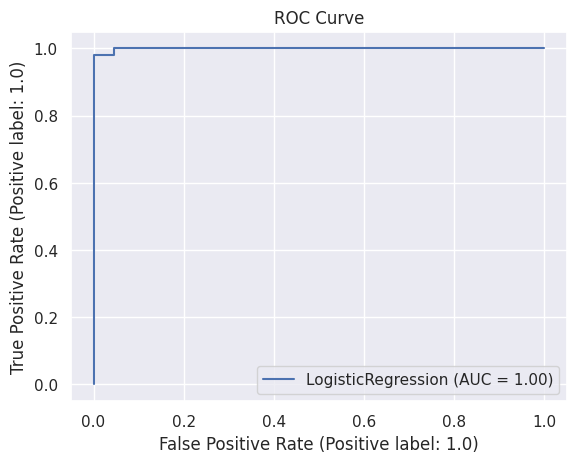

In [75]:
# Plot ROC curve
plot_roc_curve(logreg, x_test, y_test)
plt.title('ROC Curve')
plt.show()

In [76]:
preds_label = logreg.predict(x_test)
print(preds_label)
print("Test Accuracy:" + str(metrics.accuracy_score(y_test,preds_label)))

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
Test Accuracy:0.9861111111111112


### Display Important Features 

In [77]:
pd.DataFrame(zip(x_train.columns,logreg.coef_[0]), columns=['Feats','Imp']).sort_values(by='Imp',ascending=False)

,Feats,Imp
3,M,2.532473
1,R,2.375857
9,subcategory_no_of_carts_to_purchase_ratio,2.164181
5,no_of_carts_to_purchase_ratio,1.629699
2,F,1.397922
6,no_of_click_wishlist_to_purchase_ratio,0.897402
16,top_paths_add_to_cart,0.662713
10,category_no_of_click_wishlist_to_purchase_ratio,0.608423
8,category_no_of_carts_to_purchase_ratio,0.573449
0,no_of_days_active,0.392741


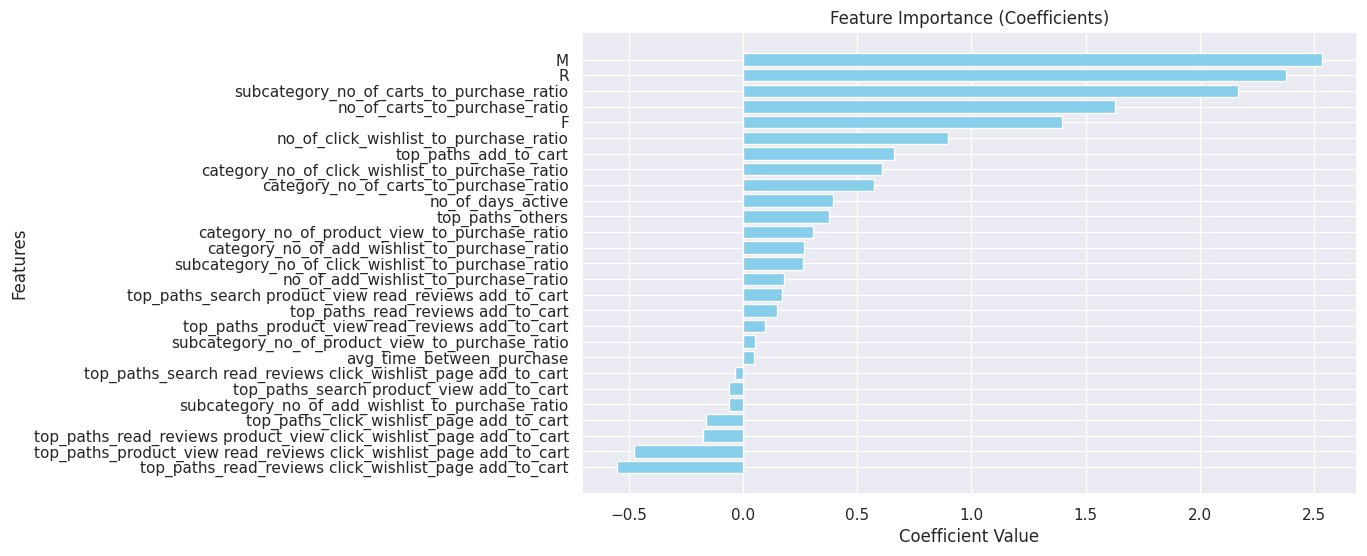

In [79]:
# DataFrame containing feature names and their corresponding coefficients
df = pd.DataFrame(zip(x_train.columns, logreg.coef_[0]), columns=['Feats', 'Imp']).sort_values(by='Imp', ascending=True)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(df['Feats'], df['Imp'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Coefficients)')
plt.show()
